# import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sns.set_theme()

# jupyter notebook full-width display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# pandas formatting
pd.set_option('display.float_format', '{:.3f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [2]:
df = pd.read_pickle('cleaned_dataset.pickle')

In [3]:
# add a DATETIME column for plotting time series
df['DATETIME'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MM'].astype(str) + '-' + df['DD'].astype(str))

# Data Types and Stats

In [32]:
df.dtypes

YEAR                         Int32
MM                           Int32
DD                           Int32
WEEK                         Int32
SITE                        object
PERIOD                      object
CONDITION                   object
FISH_NO                      Int32
FL_WET                       Int32
FL_FROZEN                    Int32
FL_STD                     float64
WEIGHT                     float64
SPECIES                     object
SEX                         object
MATURITY                     Int32
GONAD_WEIGHT               float64
1st Person Aging            object
AGE                          Int32
FSP                          Int32
Comments                    object
2nd Person Aging            object
AGE.1                        Int32
FSP.1                        Int32
Comments.1                  object
Envelop Comments            object
AGE_notes                   object
FSP_notes                   object
DATETIME            datetime64[ns]
dtype: object

In [37]:
df.describe(include='all', datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
YEAR,35619.000,NaN,NaN,NaN,2000.901,1983.000,1990.000,2000.000,2011.000,2019.000,11.021
MM,35619.000,NaN,NaN,NaN,5.392,4.000,5.000,5.000,6.000,7.000,0.500
DD,35619.000,NaN,NaN,NaN,16.121,1.000,9.000,16.000,24.000,31.000,8.768
WEEK,22371.000,NaN,NaN,NaN,5.050,1.000,4.000,5.000,6.000,9.000,2.005
SITE,35501,78,12,6668,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PERIOD,30417,2,AM,16340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CONDITION,35424,2,Frozen,25704,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FISH_NO,35619.000,NaN,NaN,NaN,17.770,1.000,9.000,17.000,25.000,100.000,11.672
FL_WET,9660.000,NaN,NaN,NaN,253.376,1.000,240.000,253.000,267.000,358.000,20.107
FL_FROZEN,25495.000,NaN,NaN,NaN,247.270,1.000,234.000,247.000,260.000,366.000,19.862


# Histograms

--------------------------------------------------
Histogram: YEAR


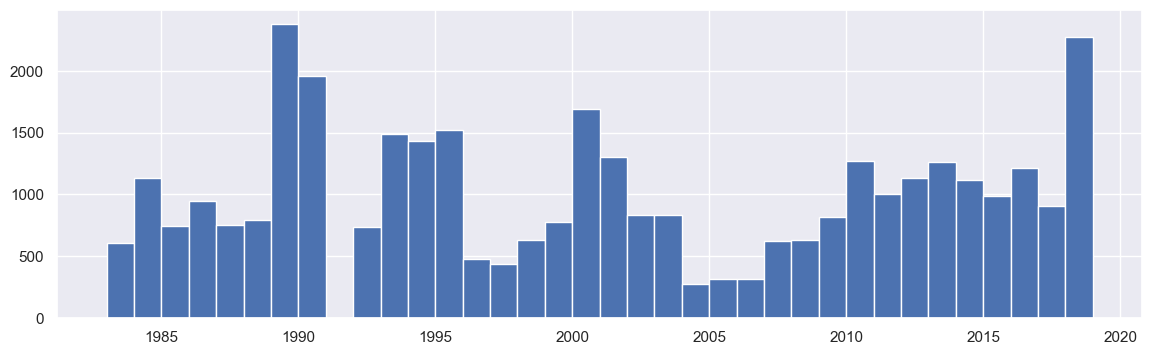

--------------------------------------------------
Histogram: MM


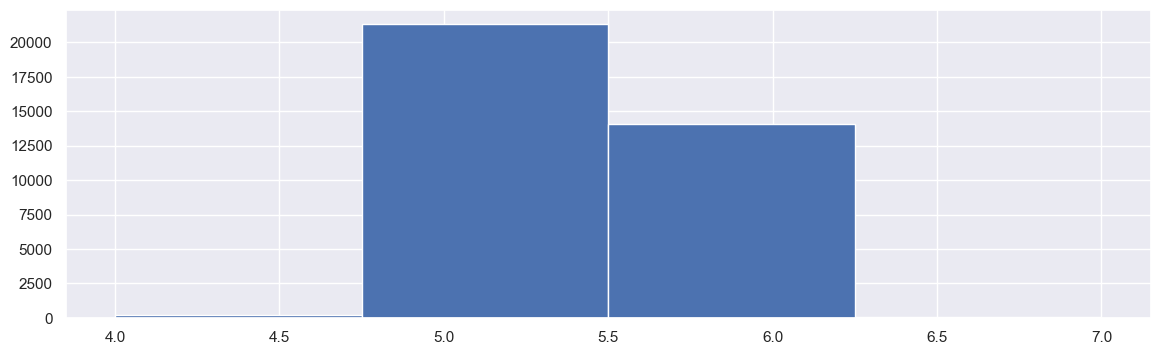

--------------------------------------------------
Histogram: DD


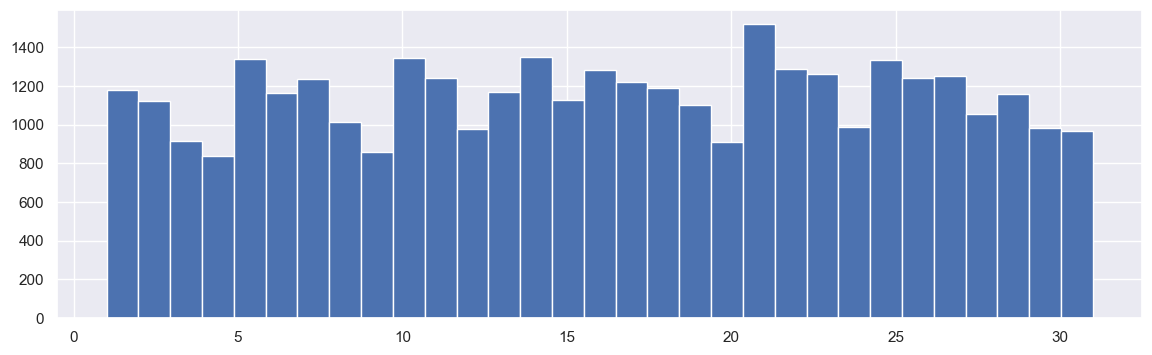

--------------------------------------------------
Histogram: WEEK


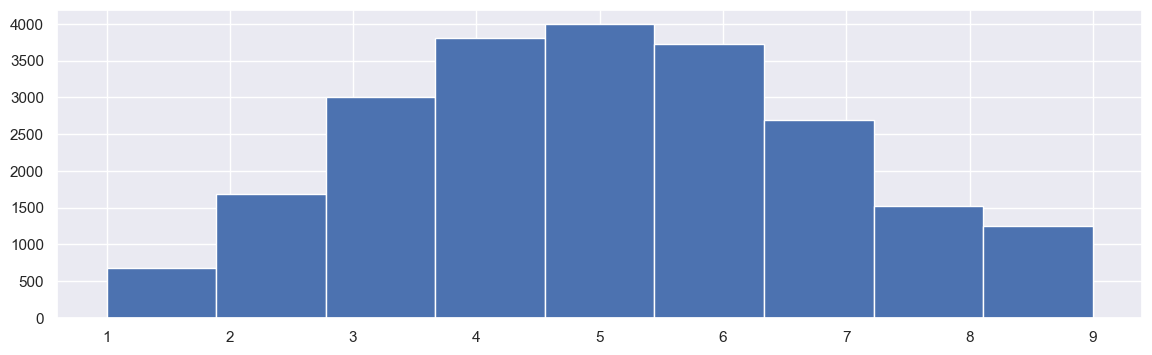

--------------------------------------------------
Histogram: PERIOD


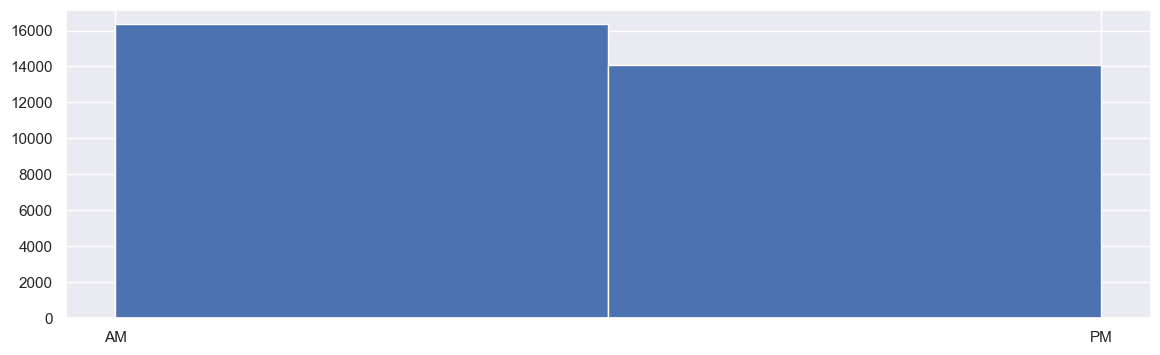

--------------------------------------------------
Histogram: CONDITION


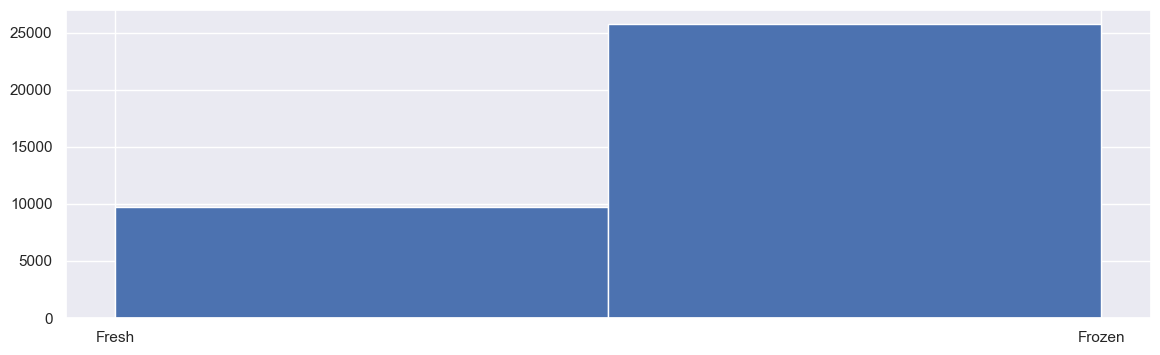

--------------------------------------------------
Histogram: FISH_NO


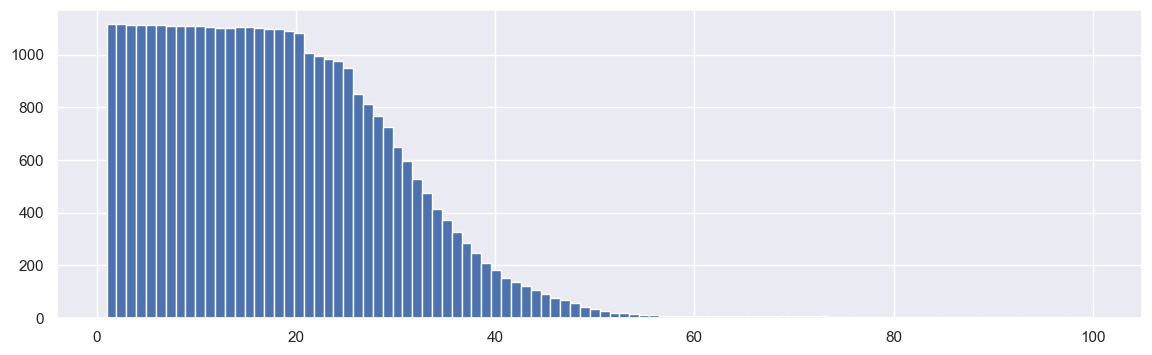

--------------------------------------------------
Histogram: FL_WET


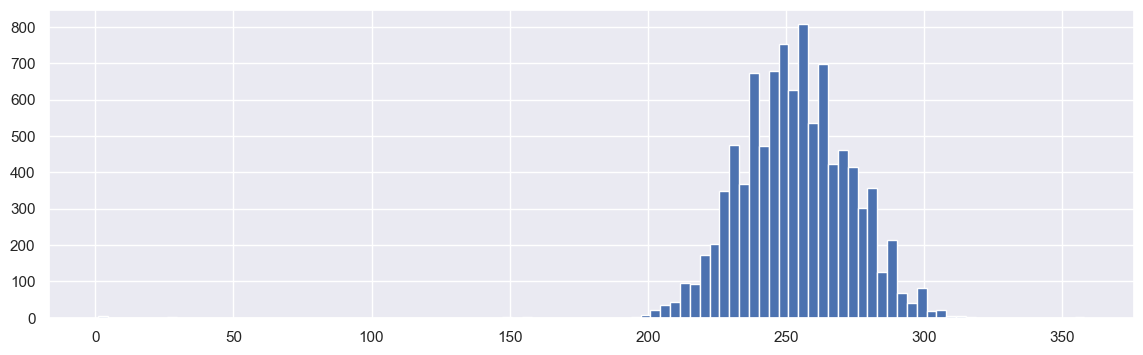

--------------------------------------------------
Histogram: FL_FROZEN


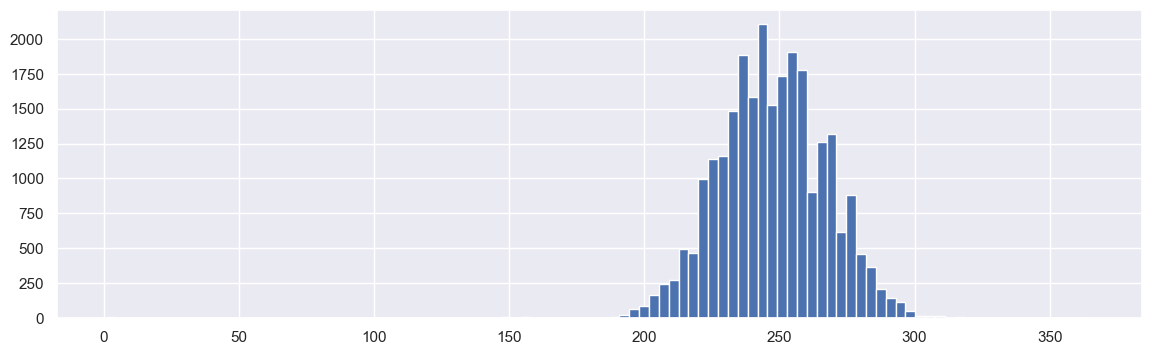

--------------------------------------------------
Histogram: FL_STD


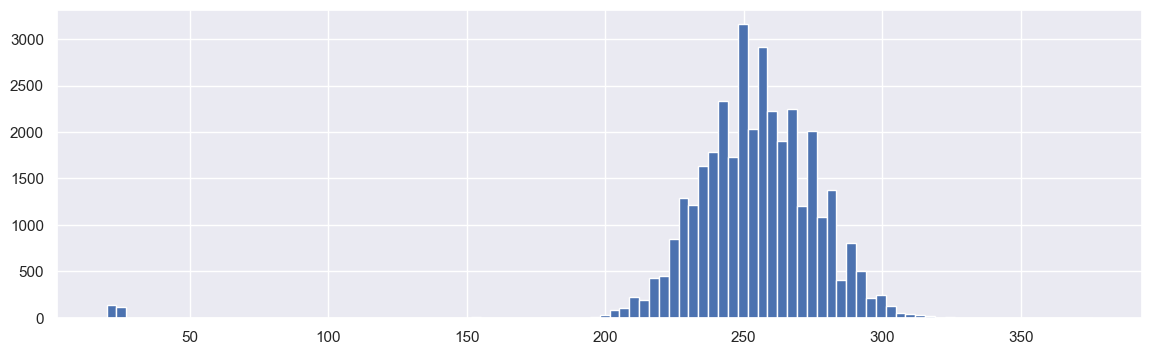

--------------------------------------------------
Histogram: WEIGHT


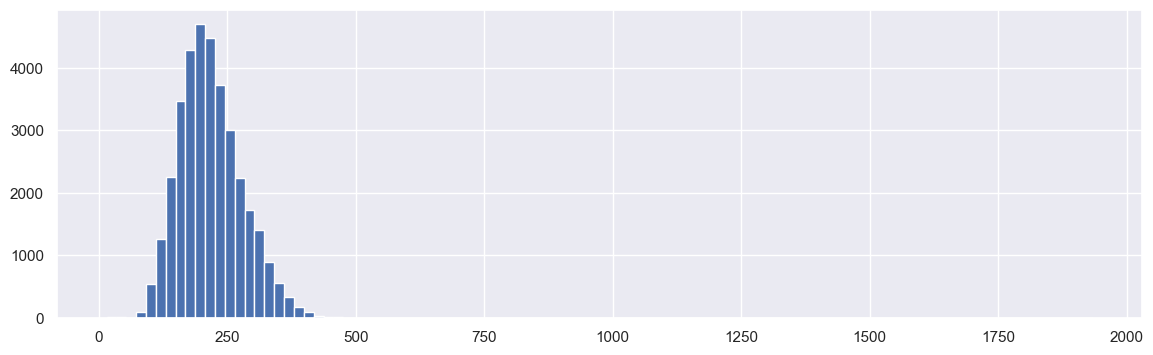

--------------------------------------------------
Histogram: SPECIES


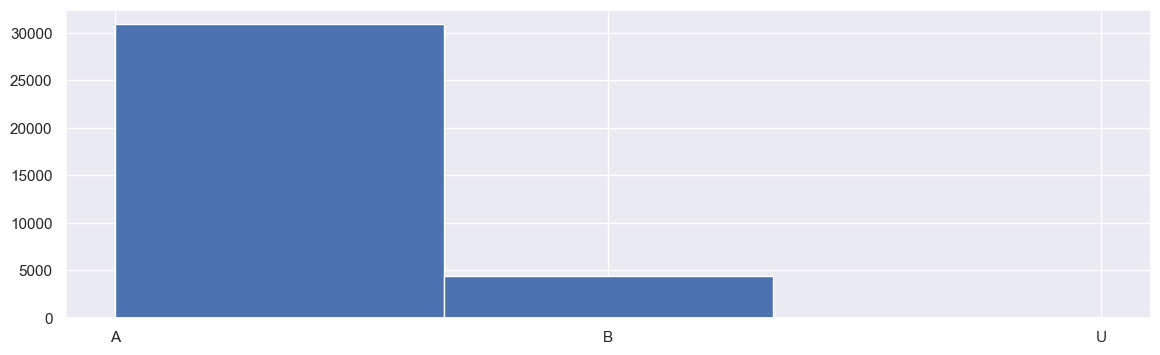

--------------------------------------------------
Histogram: SEX


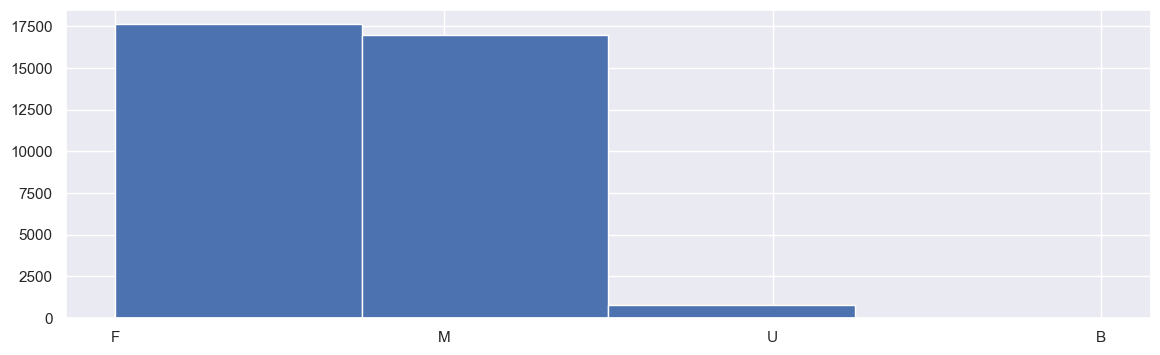

--------------------------------------------------
Histogram: MATURITY


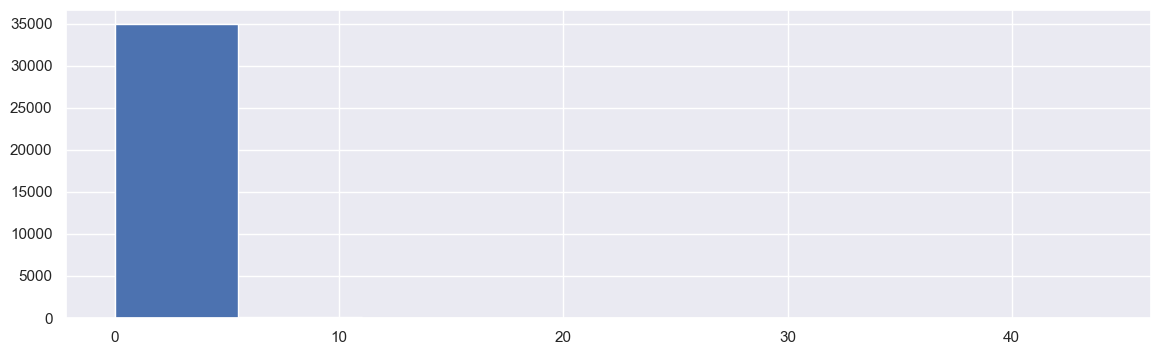

--------------------------------------------------
Histogram: GONAD_WEIGHT


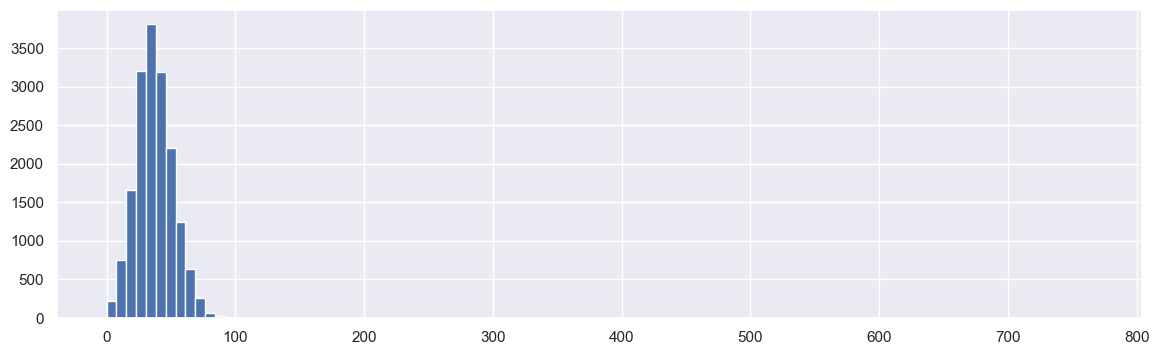

--------------------------------------------------
Histogram: 1ST PERSON AGING


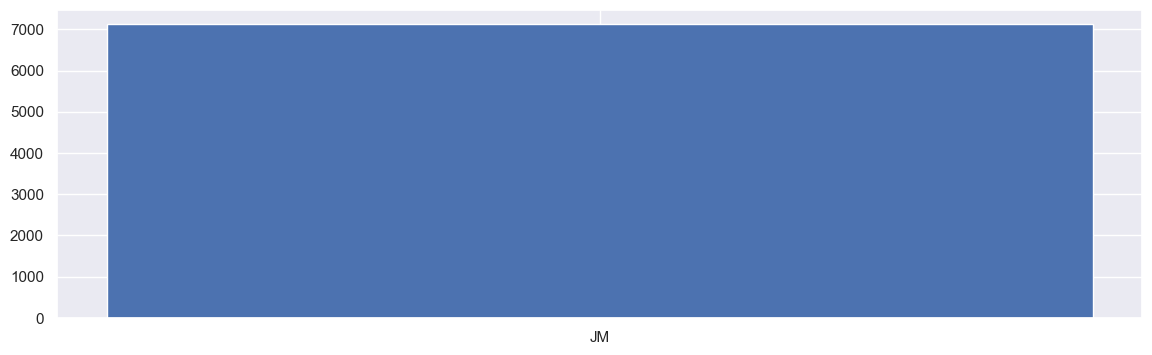

--------------------------------------------------
Histogram: AGE


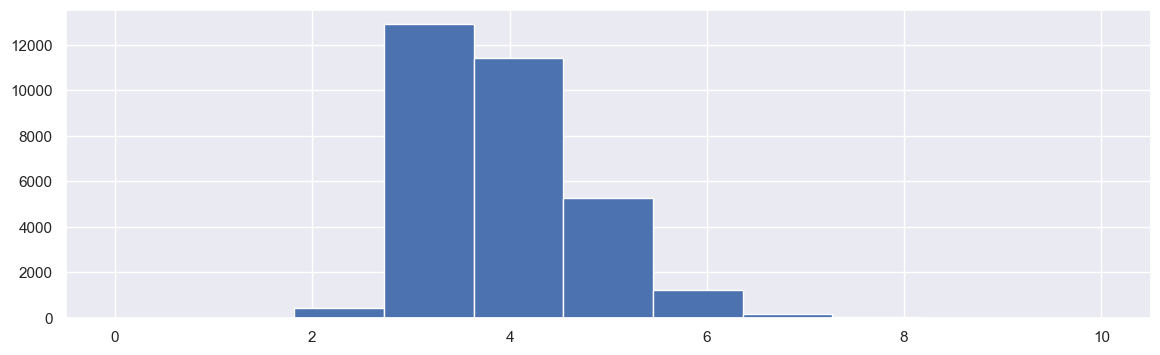

--------------------------------------------------
Histogram: FSP


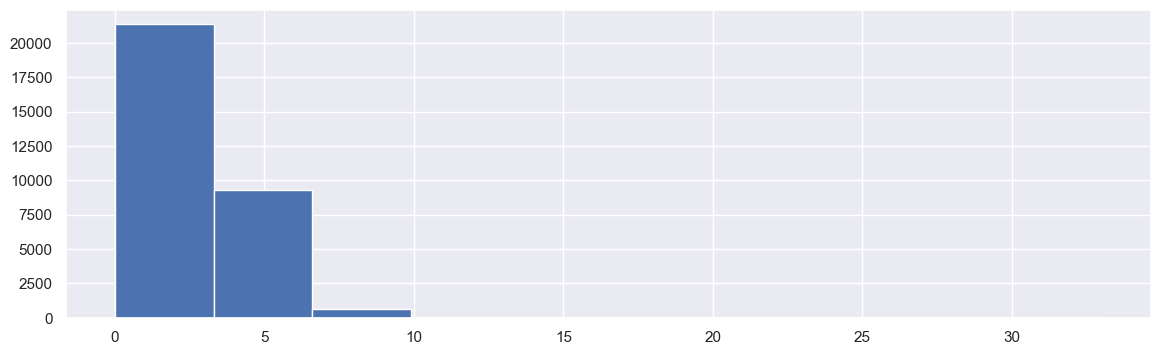

--------------------------------------------------
Histogram: 2ND PERSON AGING


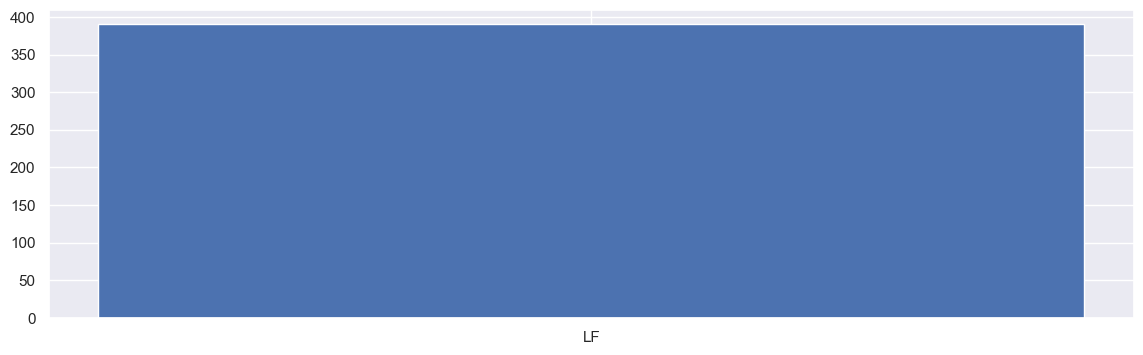

--------------------------------------------------
Histogram: AGE.1


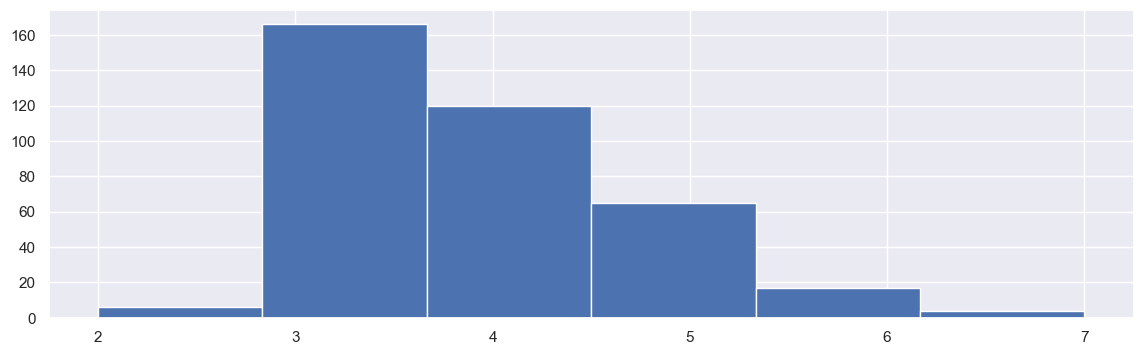

--------------------------------------------------
Histogram: FSP.1


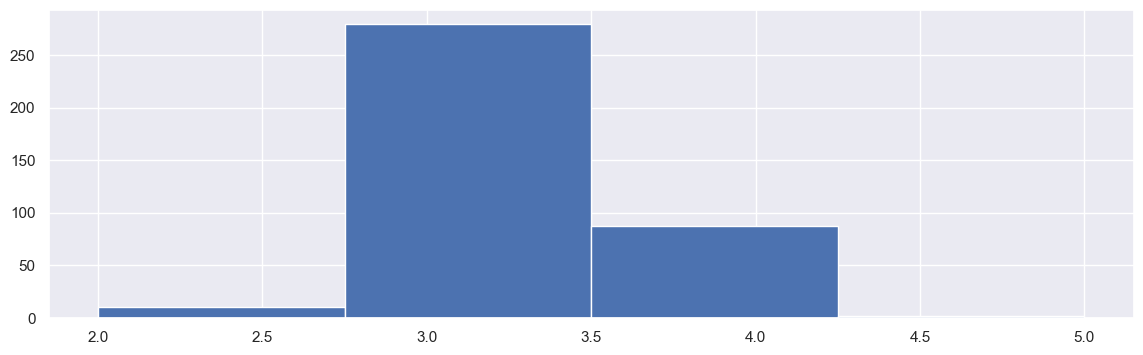

In [11]:
columns_to_print = ['YEAR', 'MM', 'DD', 'WEEK', 'PERIOD', 'CONDITION', 'FISH_NO',
       'FL_WET', 'FL_FROZEN', 'FL_STD', 'WEIGHT', 'SPECIES', 'SEX', 'MATURITY',
       'GONAD_WEIGHT', '1st Person Aging', 'AGE', 'FSP', '2nd Person Aging', 'AGE.1', 'FSP.1']

for column in columns_to_print:
    print('--------------------------------------------------\nHistogram:', column.upper())
    
    plt.figure(figsize=(14, 4))
    
    n_unique = df[column].nunique()
    
    max_bins = 100
    if n_unique <= max_bins:
        bins = n_unique
    else:
        bins = max_bins
    
    df[column].hist(bins=bins)
    
    plt.show()

# Correlation

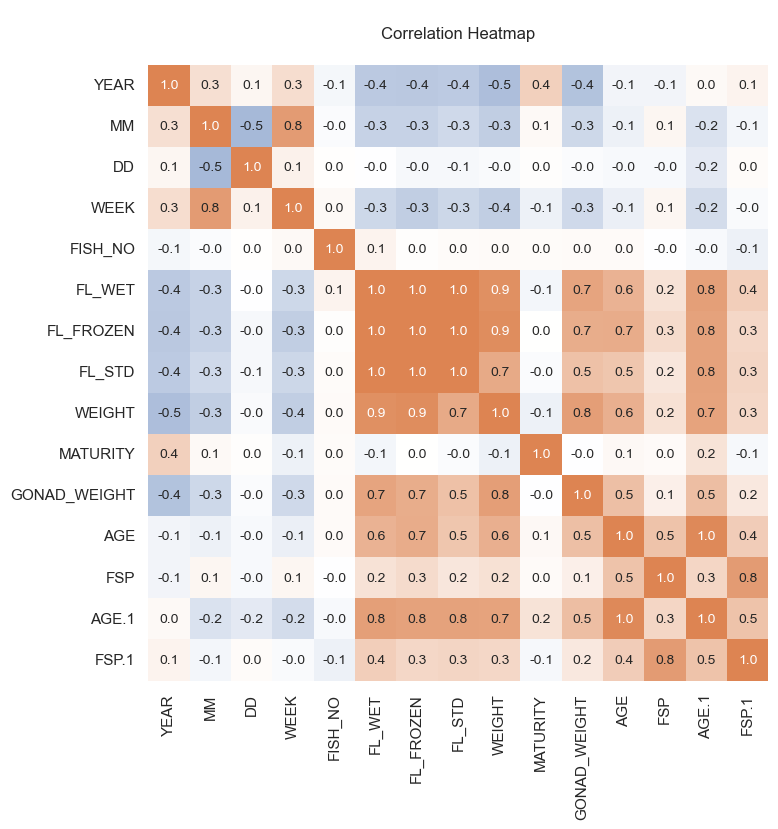

In [32]:
plt.figure(figsize=(8,8))
palette = sns.blend_palette([sns.color_palette()[0], '#ffffff', sns.color_palette()[1]], 3, as_cmap=True)
sns.heatmap(df.corr(), cmap=palette, annot=True, center=0, vmin=-1, vmax=1, fmt='.1f', annot_kws={"size": 10}, cbar=False)
plt.title('\nCorrelation Heatmap\n')
plt.show()

# Time Series


-------------------------------------------------------
CONDITION
CATEGORICAL


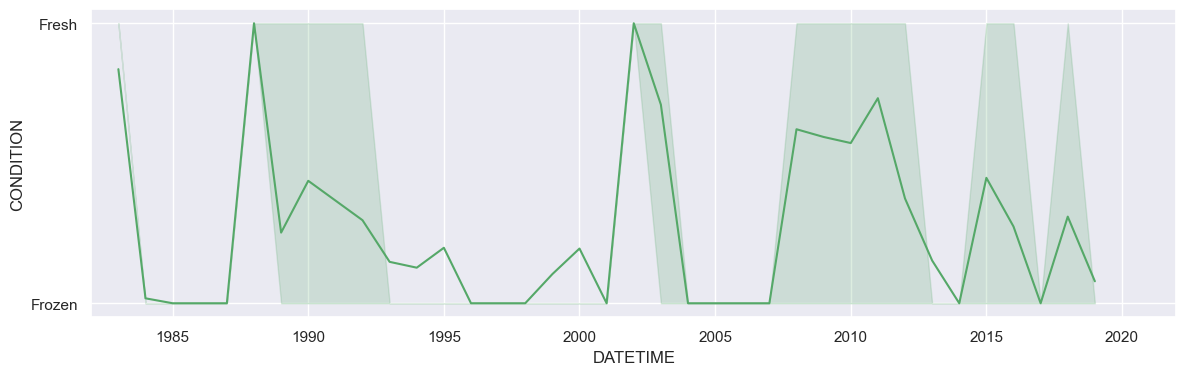


-------------------------------------------------------
FL_WET
INT


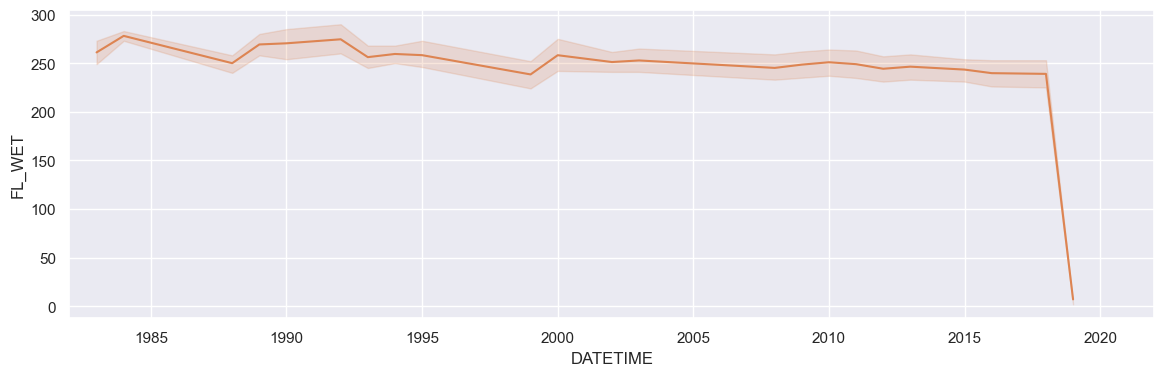


-------------------------------------------------------
FL_FROZEN
INT


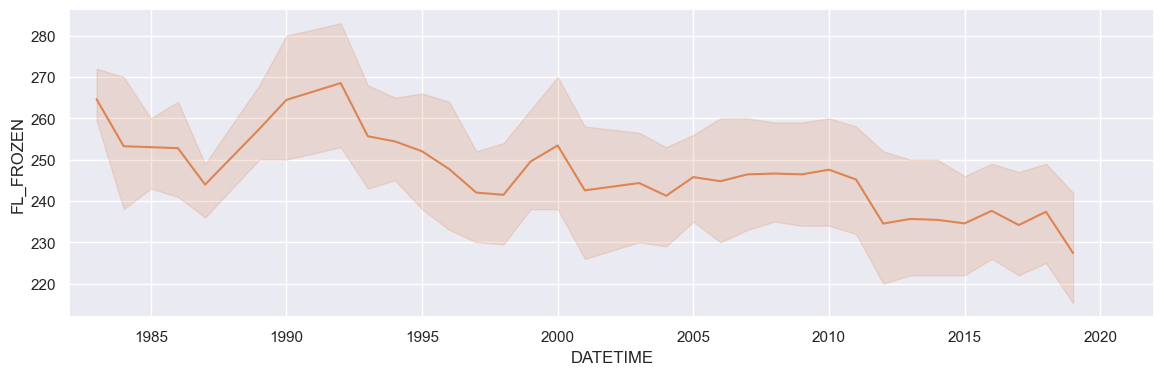


-------------------------------------------------------
FL_STD
FLOAT


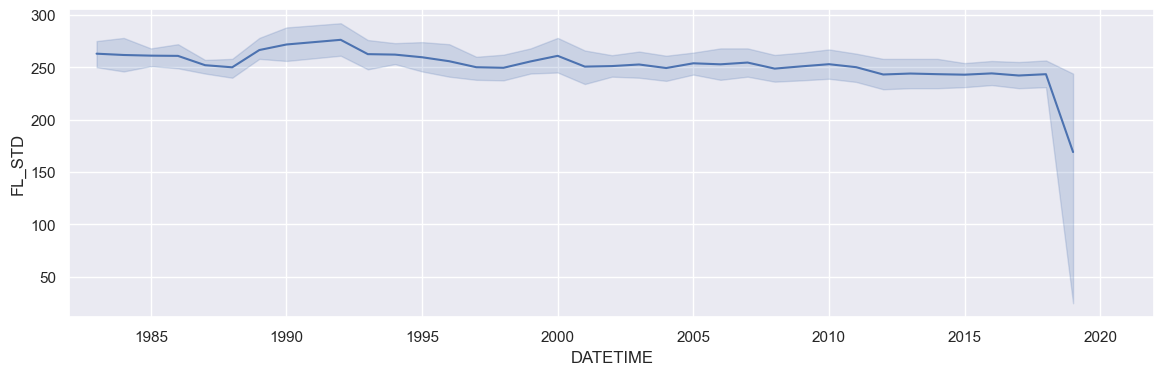


-------------------------------------------------------
WEIGHT
FLOAT


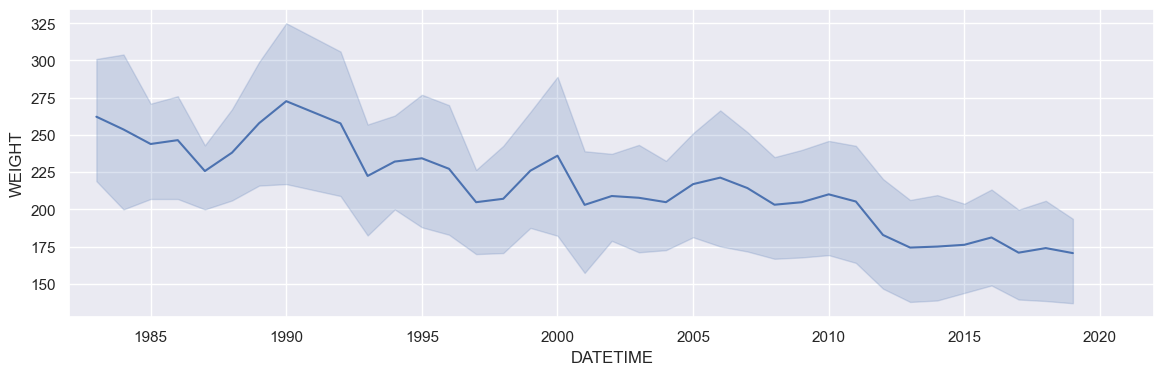


-------------------------------------------------------
SPECIES
CATEGORICAL


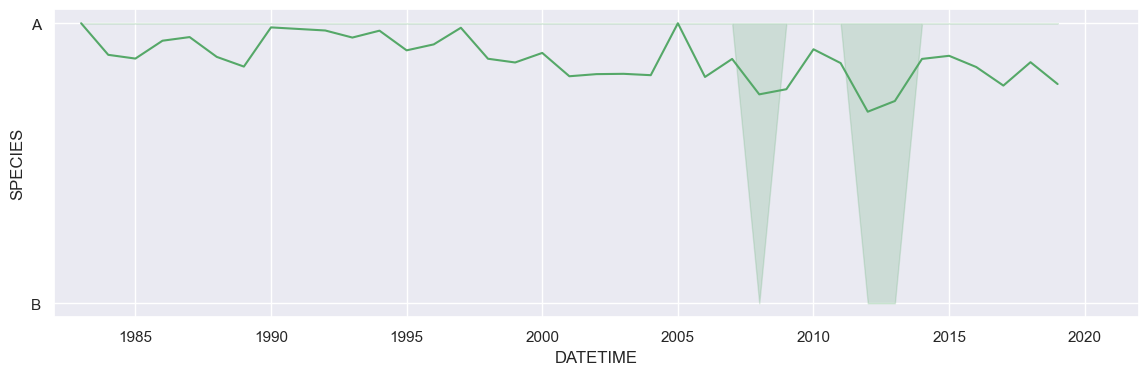


-------------------------------------------------------
SEX
CATEGORICAL


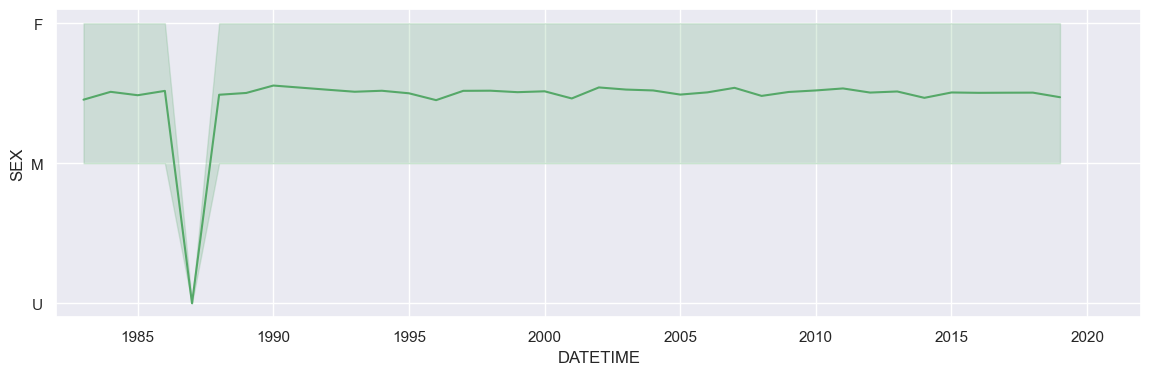


-------------------------------------------------------
MATURITY
INT


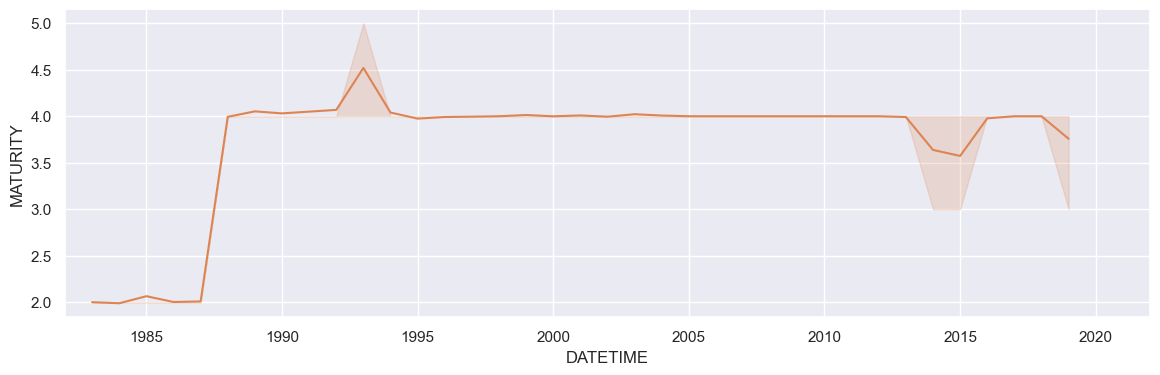


-------------------------------------------------------
GONAD_WEIGHT
FLOAT


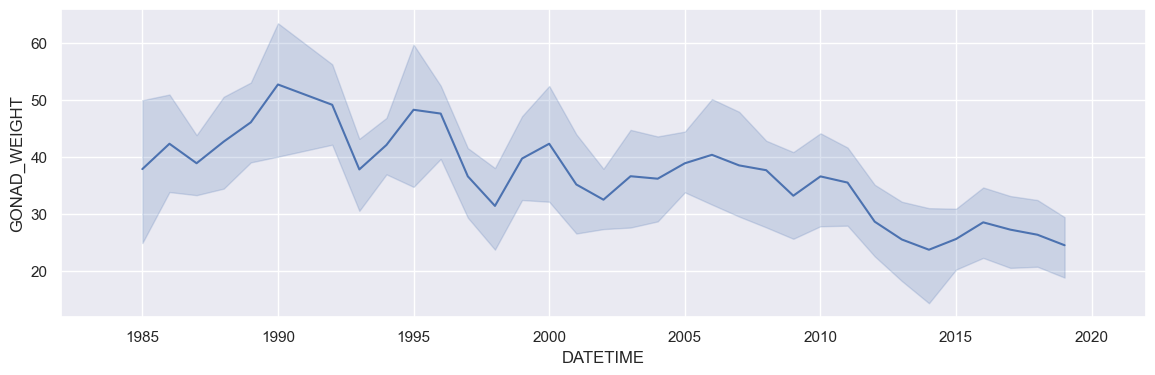


-------------------------------------------------------
AGE
INT


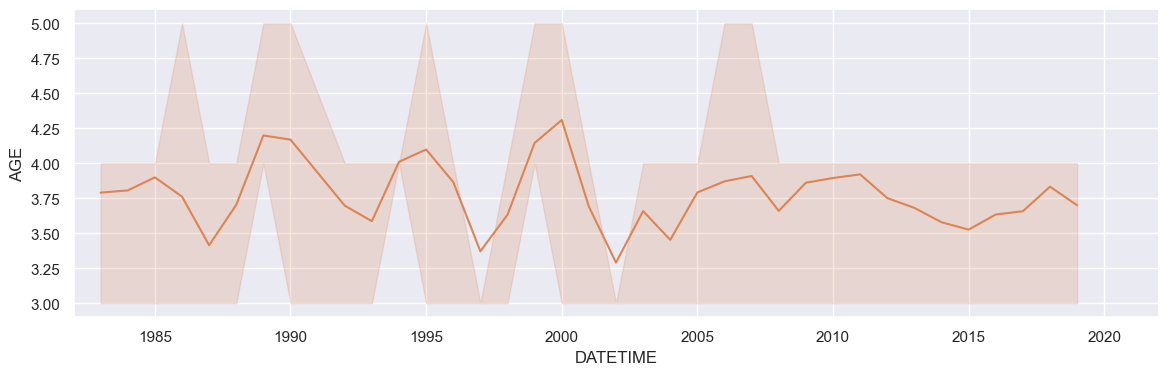


-------------------------------------------------------
FSP
INT


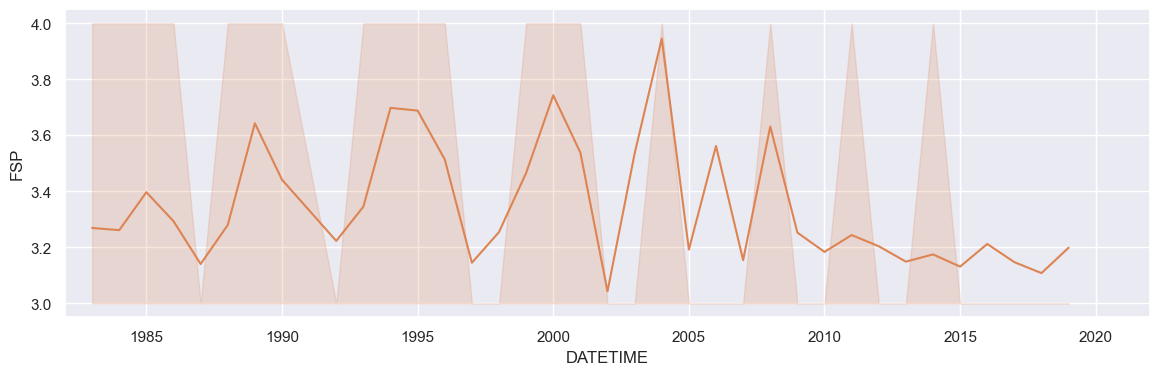


-------------------------------------------------------
AGE.1
INT


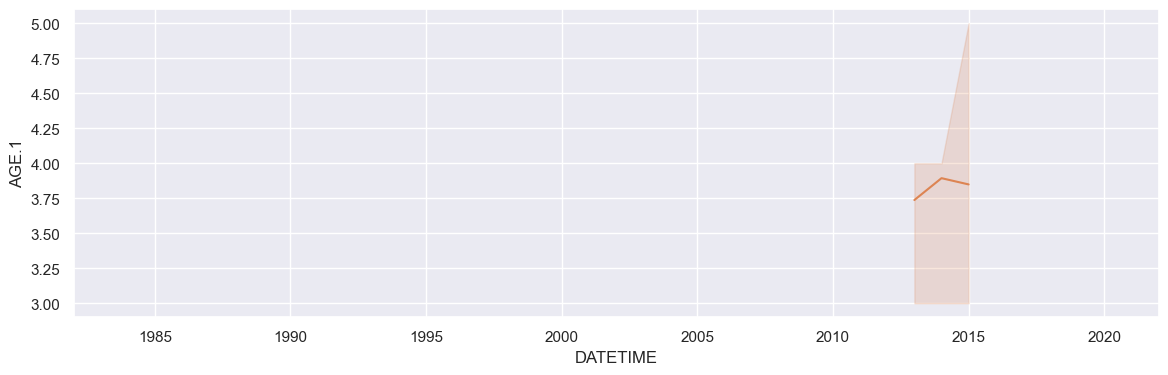


-------------------------------------------------------
FSP.1
INT


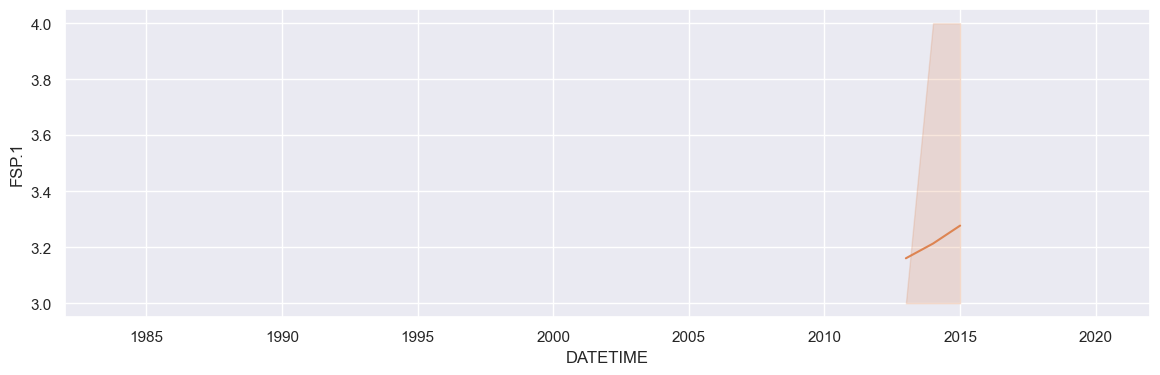

In [49]:
features = {
    'CONDITION': 'categorical',
    'FL_WET': 'integer', 
    'FL_FROZEN': 'integer',
    'FL_STD': 'float', 
    'WEIGHT': 'float', 
    'SPECIES': 'categorical', 
    'SEX': 'categorical', 
    'MATURITY': 'integer', 
    'GONAD_WEIGHT': 'float', 
    'AGE': 'integer', 
    'FSP': 'integer', 
    'AGE.1': 'integer', 
    'FSP.1': 'integer'
}

for feature in features:
    
    print('\n-------------------------------------------------------\n', feature.upper(), sep='')
    plt.figure(figsize=(14, 4))
    
    if features[feature] == 'float':
        plot = sns.lineplot(x=df.DATETIME.dt.year, y=df[feature], errorbar=('pi', 50), color=sns.color_palette()[0])
        print('FLOAT')
    elif features[feature] == 'integer':  # convert to float or get a ValueError
        plot = sns.lineplot(x=df.DATETIME.dt.year, y=df[feature].astype(float), errorbar=('pi', 50), color=sns.color_palette()[1])
        print('INT')
    elif features[feature] == 'categorical':
        plot = sns.lineplot(x=df.DATETIME.dt.year, y=df[feature], errorbar=('pi', 50), color=sns.color_palette()[2])
        print('CATEGORICAL')    
    
    # show entire dataset time period for all plots
    plot.set_xlim(1982, 2022)
    
    plt.show()

# QUESTIONS

### Q: When is the most recent data?
 * no data since 2019

In [18]:
# date range
df.DATETIME.min(), df.DATETIME.max()

(Timestamp('1983-05-09 00:00:00'), Timestamp('2019-06-28 00:00:00'))

### Q: What is happening with the latest data (drops in weight etc)?

##### data input issues?
* in 2016, there were order of magnitude difference betwwen FL_STD:
  * look to be 10x smaller
  * from row 34989 to row 35187
* similarly, month 6, there were five strange entries for FL_WET and FL_FROZEN
  * row 35058 (~100x smaller)
  * 35143 (~10x smaller)
  * 35157 (~100x smaller)
  * 35158 (~100x smaller)
  * 35186 (~100x smaller)
  * These are largely influencing the average because they are a different order of magnitude


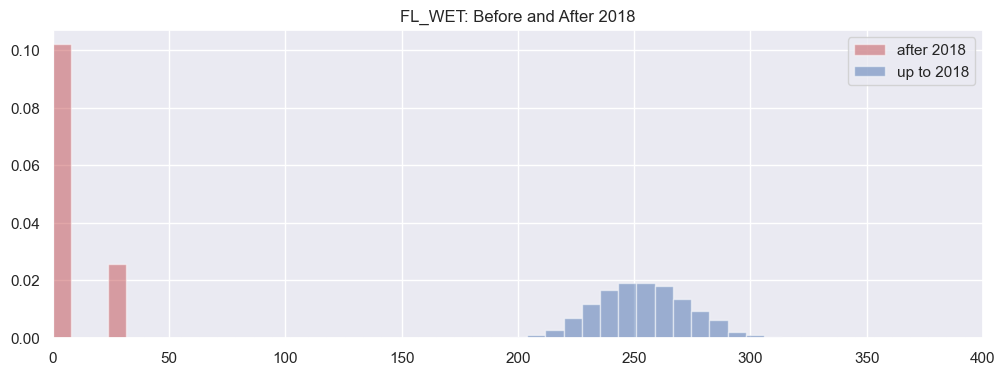

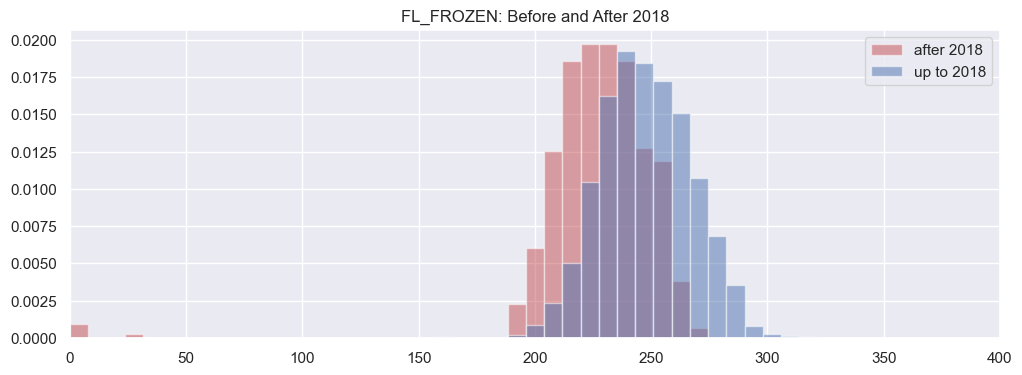

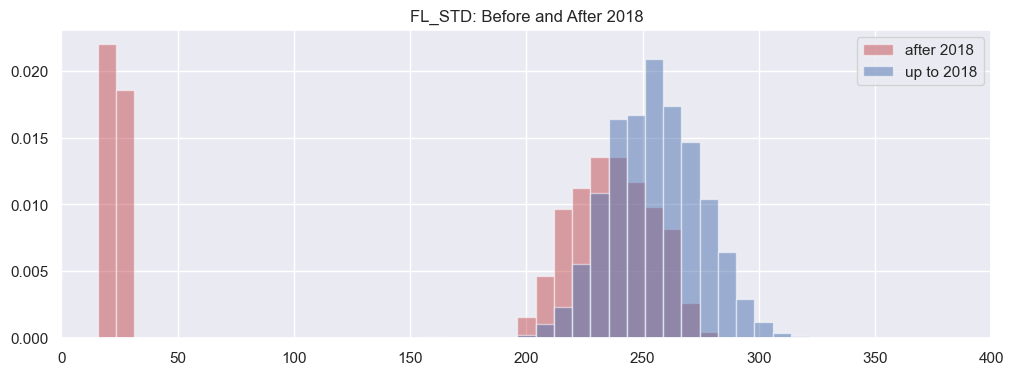

In [135]:
def hist_compare_years(year, feature, bins=50, xmin=0, xmax=400):
    
    plt.figure(figsize=(12,4))
    plt.xlim(xmin, xmax)
    
    bins_plot = [(x/(bins+1))*(xmax-xmin)+xmin for x in range(bins+2)] 
    
    df.loc[df.DATETIME.dt.year > year, feature].hist(alpha=0.5, color=sns.color_palette()[3], density=True, label=f'after {year}', bins=bins_plot)
    df.loc[df.DATETIME.dt.year <= year, feature].hist(alpha=0.5, density=True, label=f'up to {year}', bins=bins_plot)
    
    plt.legend(loc='upper right')
    
    plt.title(feature.upper() + ': Before and After ' + str(year))
    plt.show()
    

# compare years and features
features_to_compare = ['FL_WET', 'FL_FROZEN', 'FL_STD']
years_to_compare = [2018]

for feature in features_to_compare:
    for year in years_to_compare:
        hist_compare_years(year, feature)

In [134]:
features_to_compare = ['FL_WET', 'FL_FROZEN', 'FL_STD']
compare_2018 = pd.DataFrame()

for feature in features_to_compare:
    compare_2018 = pd.concat(
        [compare_2018, pd.DataFrame(df.loc[df.DATETIME.dt.year > 2018, feature].describe())],
        axis = 1
    )
    compare_2018 = pd.concat(
        [compare_2018, pd.DataFrame(df.loc[df.DATETIME.dt.year <= 2018, feature].describe())],
        axis = 1
    )
    
compare_2018.columns = ['FL_WET_2019', 'FL_WET', 'FL_FROZEN_2019', 'FL_FROZEN', 'FL_STD_2019', 'FL_STD']
compare_2018

,FL_WET_2019,FL_WET,FL_FROZEN_2019,FL_FROZEN,FL_STD_2019,FL_STD
count,5.000,9655.000,570.000,24925.000,829.000,34416.000
mean,7.000,253.504,227.393,247.724,169.088,255.194
std,11.747,19.313,26.809,19.439,100.692,19.546
min,1.000,150.000,1.000,112.000,20.000,118.000
25%,2.000,240.000,215.250,234.000,24.800,242.000
50%,2.000,253.000,230.000,247.000,224.660,255.000
75%,2.000,267.000,242.000,261.000,243.932,268.000
max,28.000,358.000,270.000,366.000,278.418,376.000


In [228]:
features_to_compare = ['FL_WET', 'FL_FROZEN', 'FL_STD']
compare_ALT = pd.DataFrame()
df_ALT = df[~df.index.isin(range(34989, 35187+1))].copy()

for feature in features_to_compare:
    compare_ALT = pd.concat(
        [compare_ALT, pd.DataFrame(df_ALT.loc[df_ALT.DATETIME.dt.year > 2018, feature].describe())],
        axis = 1
    )
    compare_ALT = pd.concat(
        [compare_ALT, pd.DataFrame(df_ALT.loc[df_ALT.DATETIME.dt.year <= 2018, feature].describe())],
        axis = 1
    )
    
compare_ALT.columns = ['FL_WET_2019', 'FL_WET', 'FL_FROZEN_2019', 'FL_FROZEN', 'FL_STD_2019', 'FL_STD']
compare_ALT

# looks correct mostly correct, but still have low values in STD rows 34796-34860 (smaller by 10x)

,FL_WET_2019,FL_WET,FL_FROZEN_2019,FL_FROZEN,FL_STD_2019,FL_STD
count,0,9655.000,563.000,24925.000,630.000,34416.000
mean,<NA>,253.504,229.355,247.724,214.537,255.194
std,<NA>,19.313,17.089,19.439,67.738,19.546
min,<NA>,150.000,189.000,112.000,21.600,118.000
25%,<NA>,240.000,216.000,234.000,218.574,242.000
50%,<NA>,253.000,230.000,247.000,233.789,255.000
75%,<NA>,267.000,242.000,261.000,247.989,268.000
max,<NA>,358.000,270.000,366.000,278.418,376.000


In [230]:
features_to_compare = ['FL_WET', 'FL_FROZEN', 'FL_STD']
compare_ALT = pd.DataFrame()

exclude1 = df.index.isin(range(34989, 35187+1))
exclude2 = df.FL_STD < 100  # arbitrary
exclude = exclude1 | exclude2

df_ALT = df[~exclude].copy()

for feature in features_to_compare:
    compare_ALT = pd.concat(
        [compare_ALT, pd.DataFrame(df_ALT.loc[df_ALT.DATETIME.dt.year > 2018, feature].describe())],
        axis = 1
    )
    compare_ALT = pd.concat(
        [compare_ALT, pd.DataFrame(df_ALT.loc[df_ALT.DATETIME.dt.year <= 2018, feature].describe())],
        axis = 1
    )
    
compare_ALT.columns = ['FL_WET_2019', 'FL_WET', 'FL_FROZEN_2019', 'FL_FROZEN', 'FL_STD_2019', 'FL_STD']
compare_ALT

# looks a bit better

,FL_WET_2019,FL_WET,FL_FROZEN_2019,FL_FROZEN,FL_STD_2019,FL_STD
count,0,9655.000,563.000,24925.000,563.000,34416.000
mean,<NA>,253.504,229.355,247.724,237.192,255.194
std,<NA>,19.313,17.089,19.439,17.333,19.546
min,<NA>,150.000,189.000,112.000,196.260,118.000
25%,<NA>,240.000,216.000,234.000,223.646,242.000
50%,<NA>,253.000,230.000,247.000,237.846,255.000
75%,<NA>,267.000,242.000,261.000,250.018,268.000
max,<NA>,358.000,270.000,366.000,278.418,376.000


In [239]:
# let's see where the wonky data is from: all 2019
df[df.FL_STD < 100]

,YEAR,MM,DD,WEEK,SITE,PERIOD,CONDITION,FISH_NO,FL_WET,FL_FROZEN,FL_STD,WEIGHT,SPECIES,SEX,MATURITY,GONAD_WEIGHT,1st Person Aging,AGE,FSP,Comments,2nd Person Aging,AGE.1,FSP.1,Comments.1,Envelop Comments,AGE_notes,FSP_notes,DATETIME
34794,2019,5,31,5,26,AM,Fresh,1,<NA>,<NA>,26.100,223.100,A,F,4,22.800,JM,5,4,?BB Mark not full,NaN,<NA>,<NA>,NaN,NaN,5,4,2019-05-31
34795,2019,5,31,5,26,AM,Fresh,2,<NA>,<NA>,21.800,138.100,A,M,4,NaN,JM,3,3,NaN,NaN,<NA>,<NA>,NaN,NaN,3,3,2019-05-31
34796,2019,5,31,5,26,AM,Fresh,3,<NA>,<NA>,26.000,233.200,A,F,4,22.500,JM,5,4,NaN,NaN,<NA>,<NA>,NaN,NaN,5,4,2019-05-31
34797,2019,5,31,5,26,AM,Fresh,4,<NA>,<NA>,28.300,271.600,A,F,4,16.700,JM,5,3,NaN,NaN,<NA>,<NA>,NaN,NaN,5,3,2019-05-31
34798,2019,5,31,5,26,AM,Fresh,5,<NA>,<NA>,21.900,119.700,A,M,4,NaN,JM,3,3,NaN,NaN,<NA>,<NA>,NaN,NaN,3,3,2019-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35181,2019,6,21,8,41,AM,Frozen,33,<NA>,<NA>,22.700,158.500,A,F,4,14.700,JM,3,3,NaN,NaN,<NA>,<NA>,NaN,NaN,3,3,2019-06-21
35182,2019,6,21,8,41,AM,Frozen,34,<NA>,<NA>,23.600,174.000,A,M,4,NaN,JM,4,3,NaN,NaN,<NA>,<NA>,NaN,NaN,4,3,2019-06-21
35183,2019,6,21,8,41,AM,Frozen,35,<NA>,<NA>,20.800,109.800,B,M,4,NaN,JM,4,4,Dark,NaN,<NA>,<NA>,NaN,NaN,4,4,2019-06-21
35184,2019,6,21,8,41,AM,Frozen,36,2,2,22.800,151.800,B,F,4,16.100,JM,4,4,Root+Apex,NaN,<NA>,<NA>,NaN,NaN,4,4,2019-06-21


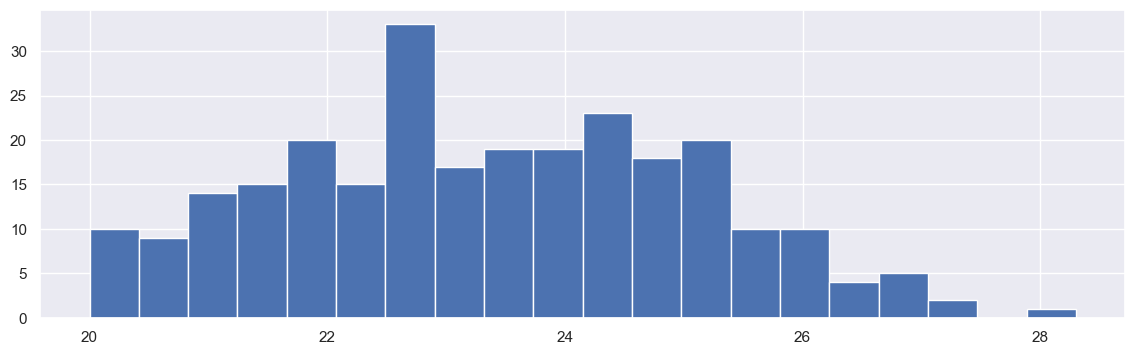

In [240]:
# let's look at it
df[df.FL_STD < 100].FL_STD.hist(figsize=(14,4), bins=20);

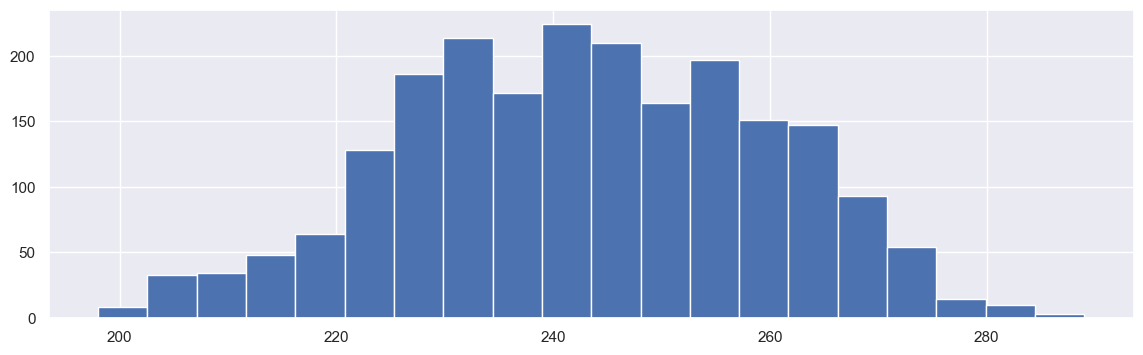

In [245]:
# 10x seems pretty accurate for 2017-2018
df[(df.YEAR > 2016) & (df.YEAR < 2019)].FL_STD.hist(figsize=(14,4), bins=20);

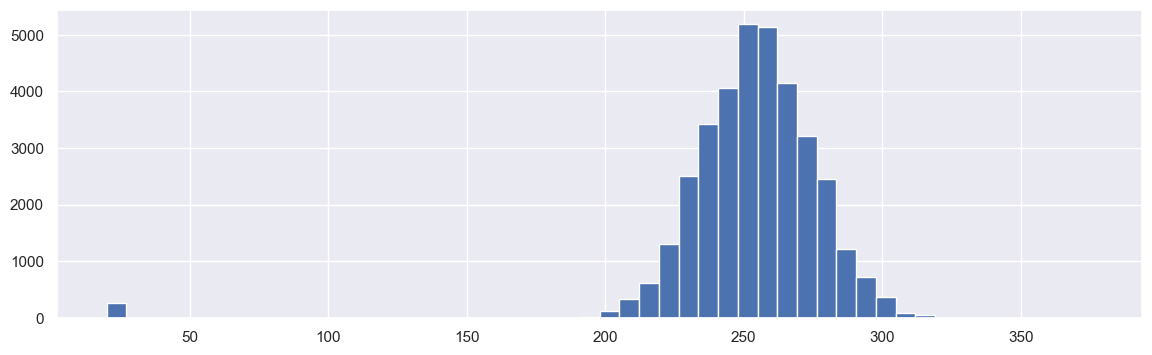

In [234]:
# less than 100 seems pretty safe as an exclusion to cut off the data
df.FL_STD.hist(figsize=(14,4), bins=50);

### Q: Is the second aging data necessary (it ends around 2015)?
  * what year does it start and end?
  * what percentage of entries?
  
##### 1% of entries, from 2013 to 2015

In [140]:
df[~df['AGE.1'].isnull()].DATETIME.min(), df[~df['AGE.1'].isnull()].DATETIME.max()

(Timestamp('2013-05-07 00:00:00'), Timestamp('2015-06-23 00:00:00'))

In [138]:
df['AGE.1'].count(), df['FSP.1'].count()

(378, 378)

In [142]:
df['FSP.1'].count() / df.shape[0]

0.01061231365282574

### Q: What is going on in the late 80s changes
  * why is SEX = U mostly in the late 80s?
  * why does average maturity sharply in the late 80s?

##### SEX

In [144]:
df[df.SEX == 'U'].DATETIME.min(), df[df.SEX == 'U'].DATETIME.max()

(Timestamp('1987-05-02 00:00:00'), Timestamp('2015-06-23 00:00:00'))

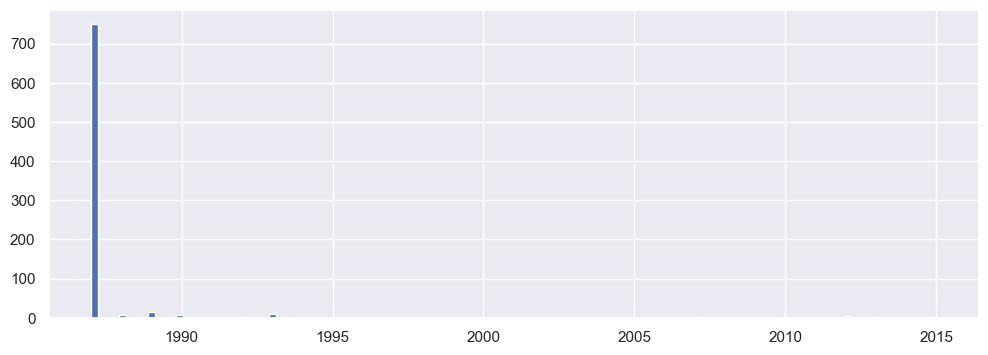

In [146]:
df[df.SEX == 'U']['YEAR'].hist(bins=2015-1897+1, figsize=(12, 4));

In [148]:
df[df.SEX == 'U'].groupby('YEAR').count()['SEX']

YEAR
1987    749
1988      7
1989     14
1990      7
1992      1
1993     10
2007      1
2010      1
2012      5
2013      1
2015      1
Name: SEX, dtype: int64

##### MATURITY

In [162]:
df.MATURITY.unique()

<IntegerArray>
[2, 1, 3, 0, 4, <NA>, 6, 5, 44]
Length: 9, dtype: Int32

In [181]:
# definitely just looks like a typo - only one 44
df[df.MATURITY == 44].shape[0]

1

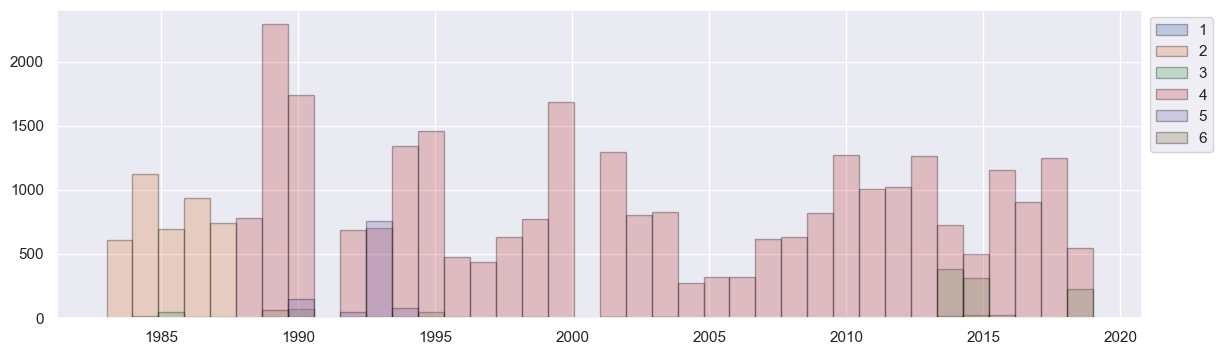

In [184]:
possible_maturity = [1, 2, 3, 4, 5, 6]

plt.figure(figsize=(14, 4))
xmin, xmax = 1983, 2019
bins = 2019 - 1983 + 1
bins_plot = [(x/(bins+1))*(xmax-xmin)+xmin for x in range(bins+2)] 

for maturity in possible_maturity:
    df.loc[df.MATURITY == maturity, 'YEAR'].hist(alpha=0.3, bins=bins_plot, label=maturity, edgecolor='black')
    
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

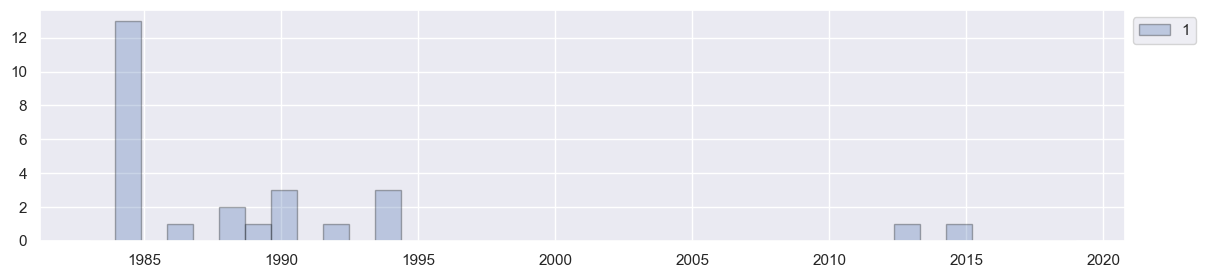

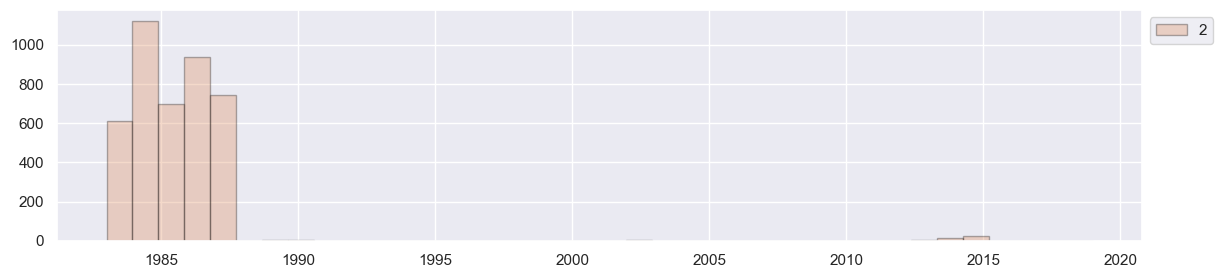

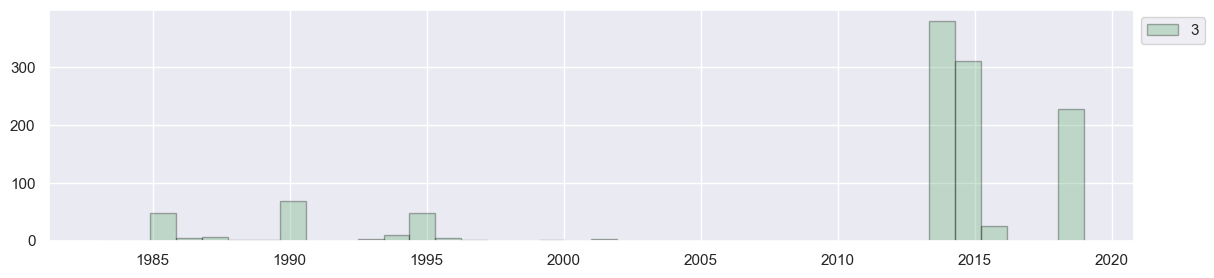

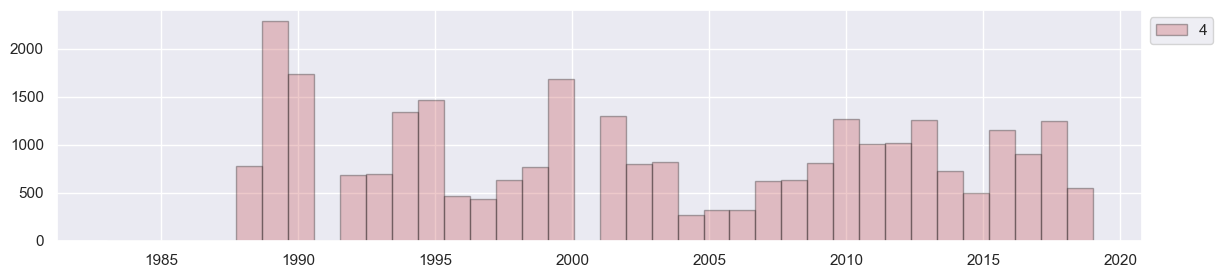

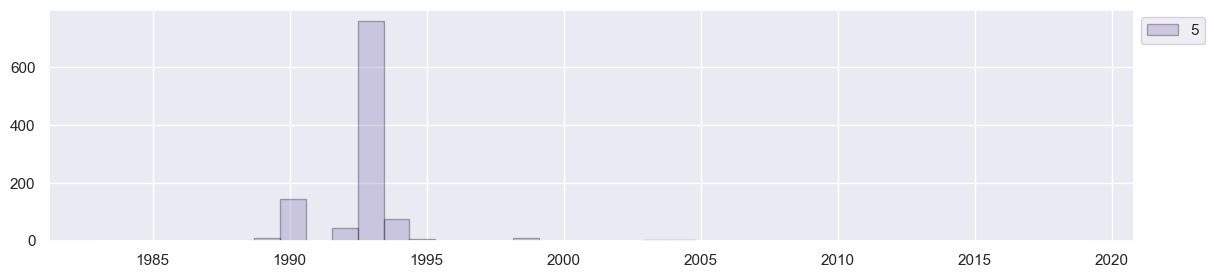

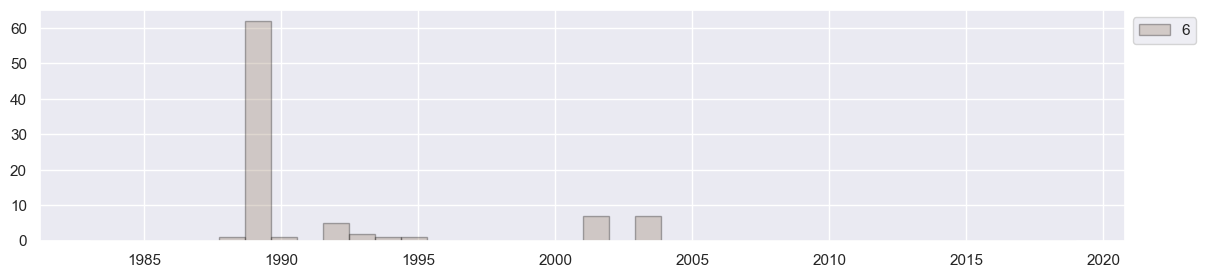

In [183]:
possible_maturity = [1, 2, 3, 4, 5, 6]

for i, maturity in enumerate(possible_maturity):

    plt.figure(figsize=(14, 3))
    xmin, xmax = 1983, 2019
    bins = 2019 - 1983 + 1
    bins_plot = [(x/(bins+1))*(xmax-xmin)+xmin for x in range(bins+2)] 

    df.loc[df.MATURITY == maturity, 'YEAR'].hist(alpha=0.3, bins=bins_plot, label=maturity, edgecolor='black', color=sns.color_palette()[i])
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    plt.show()

### Q: SPECIES categories
  * leave as A, B, U? (very few U)
    * how many U?

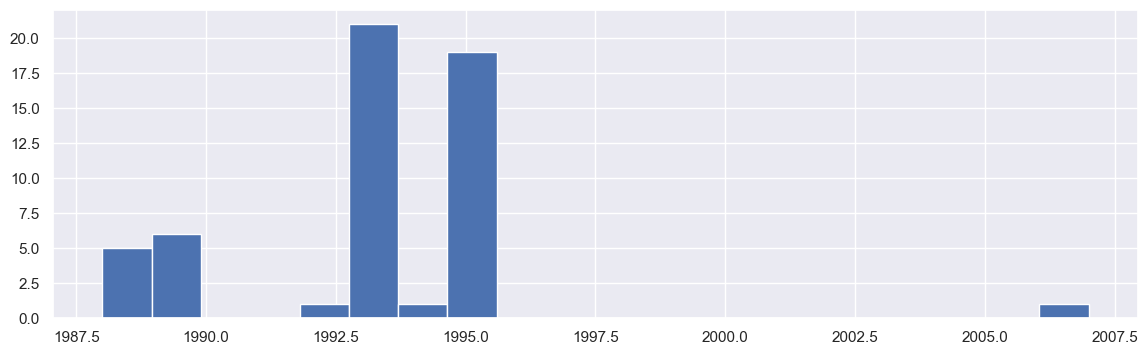

In [188]:
bins = df[df.SPECIES == 'U'].YEAR.max() - df[df.SPECIES == 'U'].YEAR.min() + 1
df[df.SPECIES == 'U'].YEAR.hist(bins=bins, figsize=(14,4));

* SEX
  * leave as F, M, U, B? (very few B)
    * how many B?
      * 1: TYPO
    * how many U?
      * 797: seem reasonable

In [193]:
# only one SEX='B' in 2016
filter = df.SEX == 'B'
df[filter].YEAR.max(), df[filter].YEAR.min(), df[filter].YEAR.count()

(2016, 2016, 1)

797

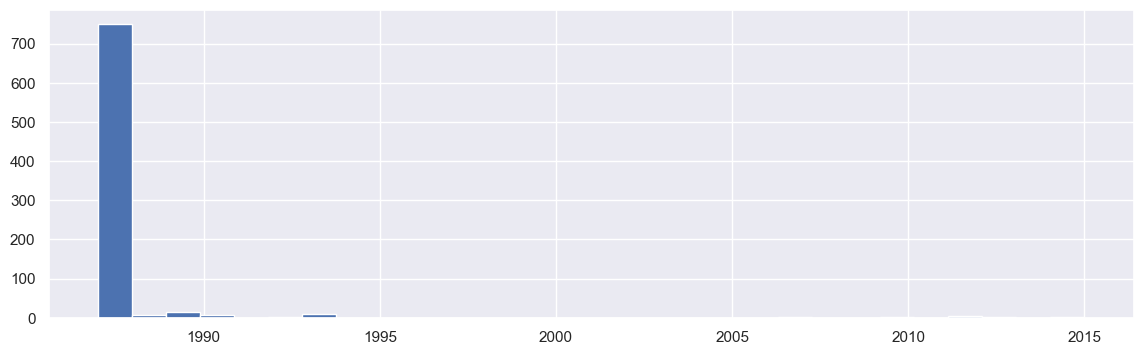

In [195]:
filter = df.SEX == 'U'
bins = df[filter].YEAR.max() - df[filter].YEAR.min() + 1
df[filter].YEAR.hist(bins=bins, figsize=(14,4));
df[filter].YEAR.count()  # 797